In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() 

import pandas as pd
import numpy as np


<AxesSubplot:xlabel='variable', ylabel='vi'>

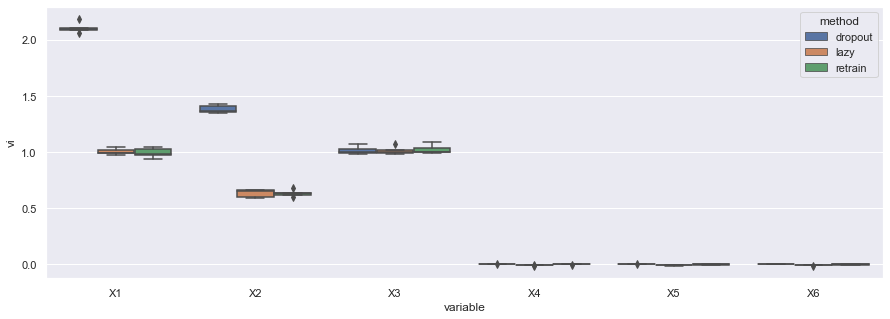

In [118]:
df = pd.read_csv('../results/linear_width12_corr0.75_tol0.001_iter5.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='vi'>

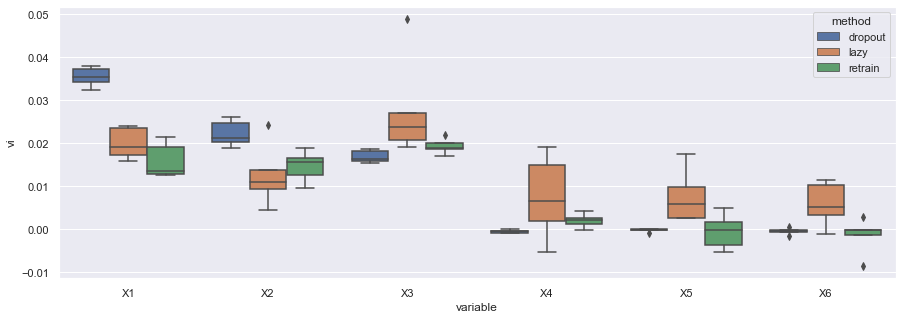

In [123]:
df = pd.read_csv('../results/logistic_width12_corr0.75_tol0.001_iter5.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='vi'>

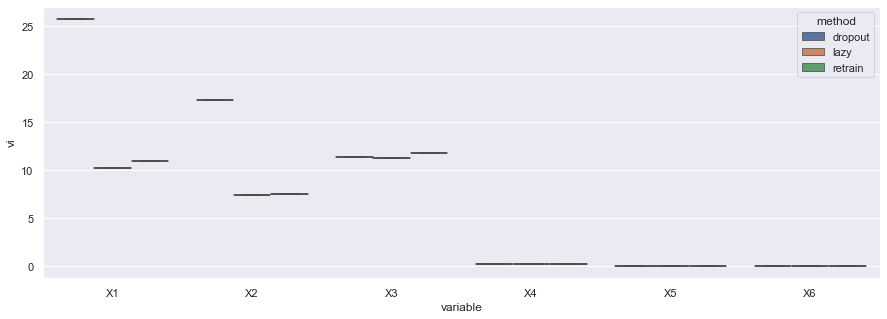

In [125]:
df = pd.read_csv('../results/2lnn_width100_corr0.75_ix0|1|2|3|4|5_iter1.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='vi'>

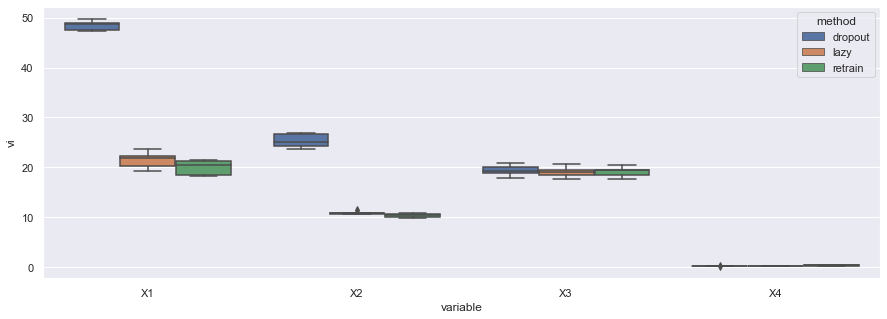

In [126]:
df = pd.read_csv('../results/2lnn_width100_corr0.75_ix0|1|2|3_iter5.csv')
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='vi', hue='method', data=df[df.variable!='all'])

<AxesSubplot:xlabel='variable', ylabel='time'>

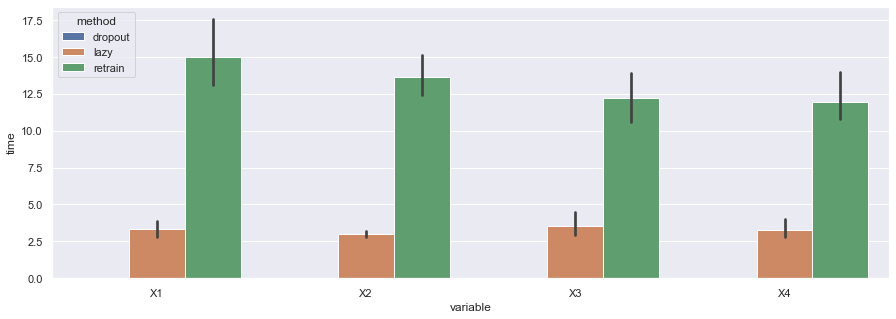

In [127]:
plt.figure(figsize=(15,5))
sns.barplot(x='variable', y='time', hue='method', data=df[df.variable!='all'])

In [113]:
1.5**2*(1 - .75**2)

0.984375

In [100]:
cv = pd.read_csv('../results/cv/linear_width100_corr0.75_tol0.001_iter5.csv')

<AxesSubplot:xlabel='lam', ylabel='mse'>

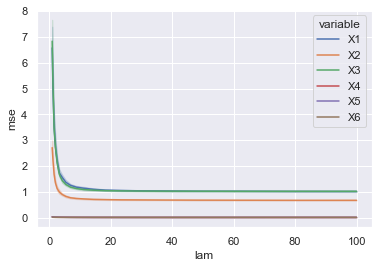

In [102]:
sns.lineplot(x='lam', y='mse', hue='variable', data=cv)

<AxesSubplot:xlabel='variable', ylabel='lam'>

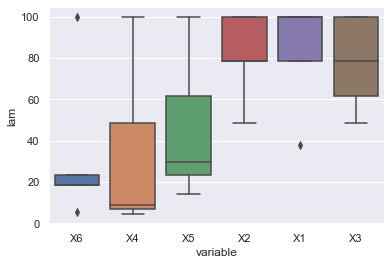

In [109]:
sns.boxplot(x='variable', y='lam', 
            data=cv.groupby(['lam', 'iter', 'variable']
                           ).mse.mean().sort_values().reset_index().drop_duplicates(['iter', 'variable']))

In [87]:
cv = pd.read_csv('../results/cv/logistic_width12_corr0.75_tol0.001_iter5.csv')

<AxesSubplot:xlabel='lam', ylabel='mse'>

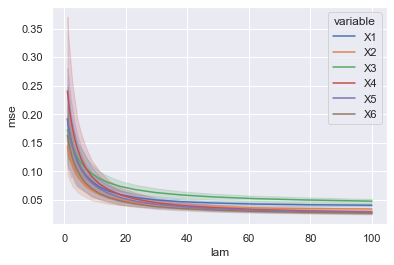

<AxesSubplot:xlabel='lam', ylabel='mse'>

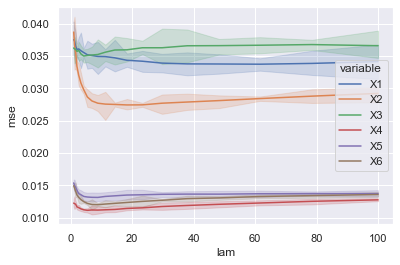

In [86]:
sns.lineplot(x='lam', y='mse', hue='variable', data=cv)

<AxesSubplot:xlabel='lam', ylabel='mse'>

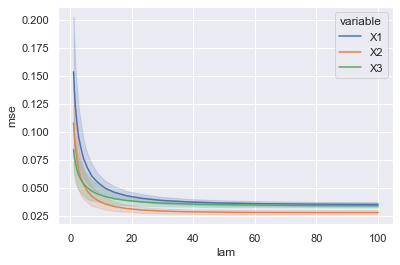

In [80]:
sns.lineplot(x='lam', y='mse', hue='variable', 
             data=cv[cv.variable.isin(['X1', 'X2', 'X3'])].groupby(
                 ['lam', 'iter', 'variable']).mse.mean().reset_index())

In [82]:
cv.groupby(['variable', 'iter', 'lam']).mse.mean().sort_values().reset_index(
).drop_duplicates(['variable', 'iter'])

,variable,iter,lam,mse
0,X5,9,29.763514,0.010773
1,X4,9,23.357215,0.010826
8,X6,9,48.329302,0.010896
15,X5,6,100.000000,0.011115
22,X5,2,8.858668,0.011193
31,X4,6,100.000000,0.011362
32,X4,2,6.951928,0.011375
38,X5,1,8.858668,0.011451
48,X5,5,100.000000,0.011549
53,X5,8,100.000000,0.011611
